
# Introduction
We are looking into the campus recruitment dataset. 

First off, what exactly is a job recruitment? 

A job placement is very similar to an internship, just much longer. Doing placement as part of the course provides huge benefit by providing great working experience and increase your employability when you are ready to enter the market. No, you won't be just making coffee although you will be responsible for quite a fair amount of general administrative duties. Since you are considered an employee in the company. you will have the opportunity to develop your skills through meatier assignments. After you have completed your job placement, you may be given the opportunity to join the company if you exceed their expectations! 

For this dataset, we have created the following objectives to answer common questions frequently asked.

## Objectives
1. Which factor influenced a candidate in getting placed?
2. Does percentage matters for one to get placed?
3. Which degree specialization is much demanded by corporate?
4. Play with the data conducting all statistical tests.

### Importing required packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [42]:
# importing dataset
from google.colab import files
upload = files.upload()

Saving placement.csv to placement (2).csv


In [89]:
# defining function to print necessary info and define dataframe
def data_frame():
  """
  Print first 5 rows of data
  Print structure of the data
  Print data types of column
  Print number of NAN/NULL values
  Print summary of the dataset
  """
  data = pd.read_csv('placement.csv')
  print("The head of data is: \n")
  print(data.head())
  print("\nThe number of rows and columns:\n ")
  print(data.shape)
  print("\nThe data types of column:\n")
  print(data.dtypes)
  print("\nThe number of NAN/NULL values is:\n")
  print(data.isnull().sum())
  print("\n The summary of the dataset is:\n")
  print(data.describe())
  return data

df = data_frame()

The head of data is: 

   sl_no gender  ssc_p    ssc_b  ...  specialisation  mba_p      status    salary
0      1      M  67.00   Others  ...          Mkt&HR  58.80      Placed  270000.0
1      2      M  79.33  Central  ...         Mkt&Fin  66.28      Placed  200000.0
2      3      M  65.00  Central  ...         Mkt&Fin  57.80      Placed  250000.0
3      4      M  56.00  Central  ...          Mkt&HR  59.43  Not Placed       NaN
4      5      M  85.80  Central  ...         Mkt&Fin  55.50      Placed  425000.0

[5 rows x 15 columns]

The number of rows and columns:
 
(215, 15)

The data types of column:

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64

### Dealing with NaN values 
- Since we have 67 NAN values in salary columns, we will replace that with 0.

In [0]:
df = df.fillna(0)

## Can gender affects salary?

Text(0.5, 1.0, 'Boxplot for gender vs salary')

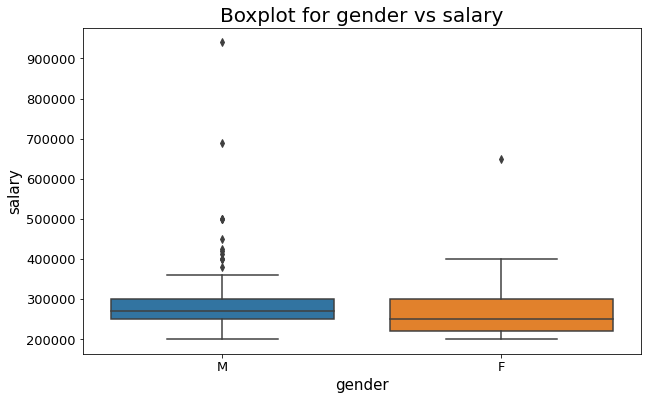

In [93]:
# Create a boxplot (gender vs salary)
df_placed = df[df['status'] == 'Placed']
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df_placed, x='gender', y='salary', ax=ax)
plt.title("Boxplot for gender vs salary", fontsize=20)

### Analysis
* The average recruitment salary for male is just slightly higher than female.

## Does academic results affect salary obtained?
- Do note that these data will only include students that got the job placement.

Text(0.5, 0, 'Scores in 10th grade')

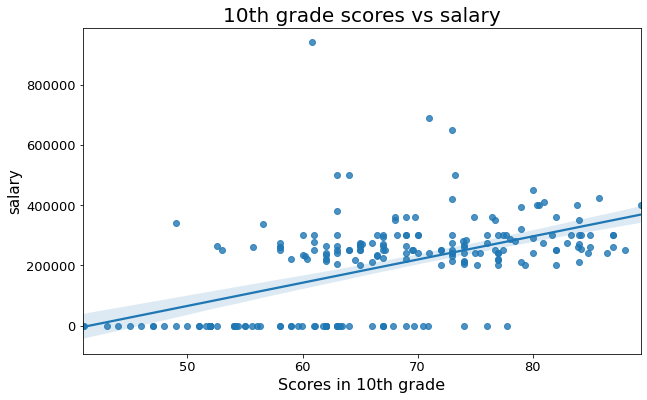

In [97]:
# Secondary Education percentage- 10th Grade vs Salary
# Create a regplot 
ssc_passed = df[['gender','ssc_p', 'salary', 'status']]
# ssc_passed = ssc_passed[ssc_passed['status'] == 'Placed']
fig, ax = plt.subplots(figsize = (10,6))
sns.regplot(data = ssc_passed, x = 'ssc_p', y = 'salary', ax=ax)
plt.title("10th grade scores vs salary", fontsize=20)
plt.xlabel("Scores in 10th grade", fontsize=16)

Text(0.5, 0, 'Scores in 12th grade')

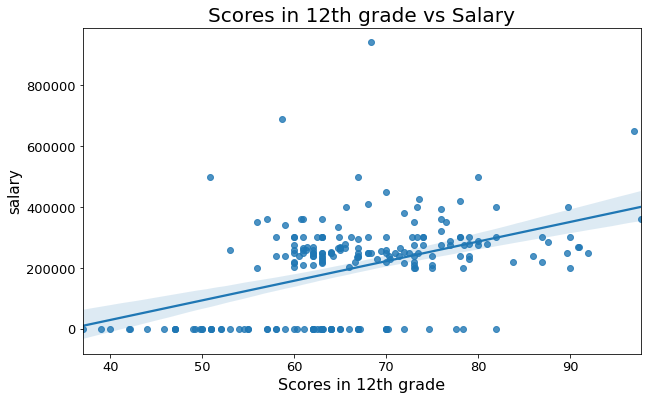

In [98]:
# Higher Secondary Education percentage- 12th Grade vs Salary
# Create a regplot 
hsc_passed = df[['gender', 'hsc_p', 'salary', 'status']]
# hsc_passed = hsc_passed[hsc_passed['status'] == 'Placed']
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(data = hsc_passed, x = 'hsc_p', y ='salary')
plt.title('Scores in 12th grade vs Salary', fontsize=20)
plt.xlabel('Scores in 12th grade', fontsize=16)

Text(0.5, 0, 'Scores in degree')

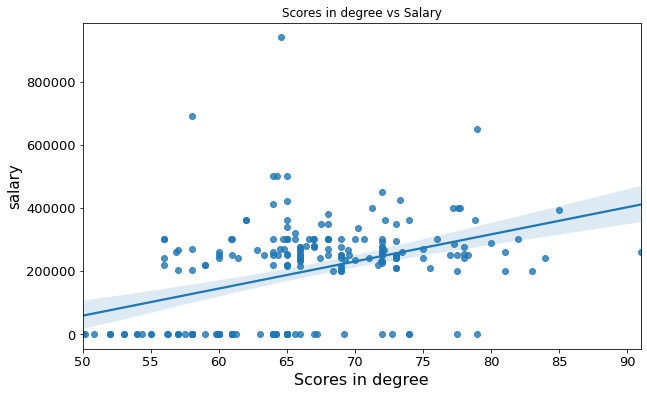

In [99]:
# Degree percentage vs Salary
 degree_passed = df[['degree_p', 'gender', 'salary', 'status']]
#  degree_passed = degree_passed[degree_passed['status'] == 'Placed']
 fig,ax = plt.subplots(figsize=(10,6))
 sns.regplot('degree_p', 'salary', data=degree_passed)
 plt.title('Scores in degree vs Salary')
 plt.xlabel('Scores in degree', fontsize=16)

Text(0.5, 0, 'Employability scores')

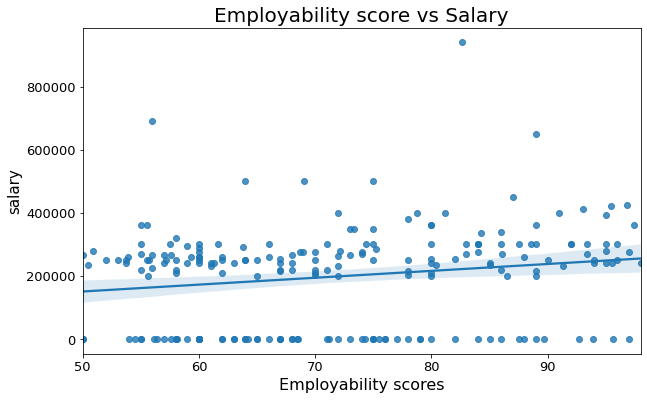

In [100]:
# Employability test percentage vs salary
etest_passed = df[['etest_p', 'salary', 'status']]
# etest_passed = etest_passed[etest_passed['status'] == 'Placed']
fig,ax = plt.subplots(figsize=(10,6))
sns.regplot('etest_p', 'salary', data = etest_passed)
plt.title('Employability score vs Salary', fontsize=20)
plt.xlabel('Employability scores', fontsize=16)

Text(0.5, 0, 'MBA test percentage')

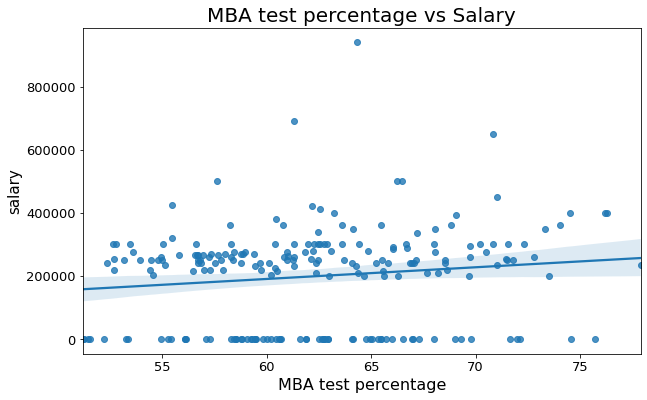

In [101]:
# MBA test percentage vs salary
mba_passed = df[['mba_p', 'salary', 'status']]
# mba_passed = mba_passed[mba_passed['status'] == 'Placed']
fix, ax = plt.subplots(figsize=(10,6))
sns.regplot('mba_p', 'salary', data = mba_passed)
plt.title("MBA test percentage vs Salary", fontsize=20)
plt.xlabel("MBA test percentage", fontsize=16)

### Analysis
* Salary & Placement is dependent on 10th,12th grade and degree scores.
* Salary increases with higher scores in Employability test, MBA test, 

## Can type of specialisation affect placement?

Text(0.5, 1.0, 'Placement between genders')

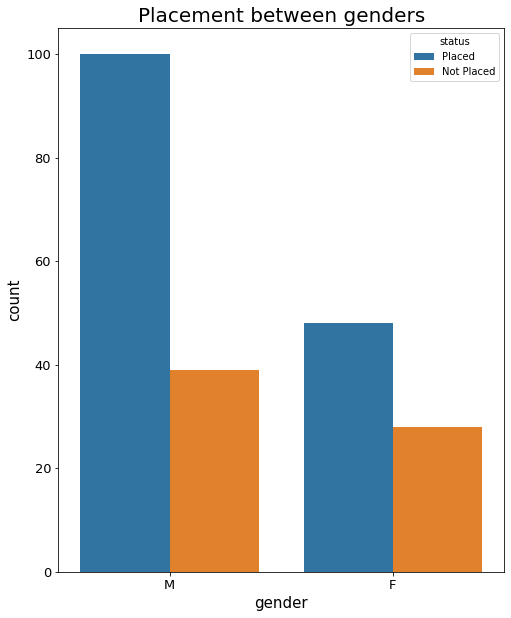

In [78]:
# Look at placement between gender
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(x='gender', hue='status', data = df)

plt.title("Placement between genders", fontsize=20)


Text(0.5, 1.0, 'Placement based on High school passout')

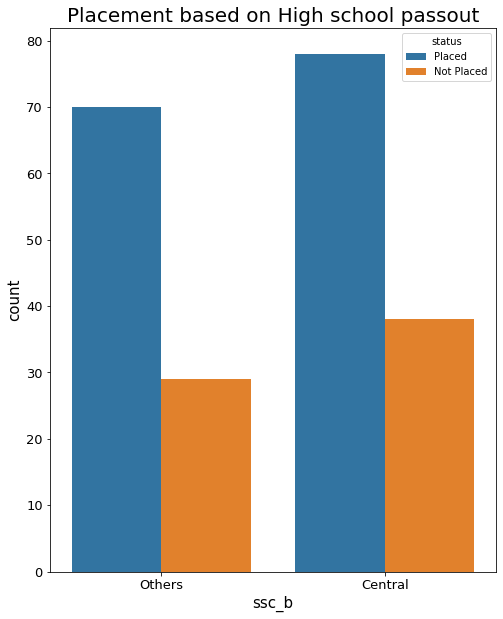

In [79]:
# Specialisation among ssc education
plt.figure(figsize=(8, 10))

sns.countplot(data = df, x = 'ssc_b', hue='status')
plt.title("Placement based on High school passout", fontsize=20)

Text(0.5, 1.0, 'Placement based on High school passout')

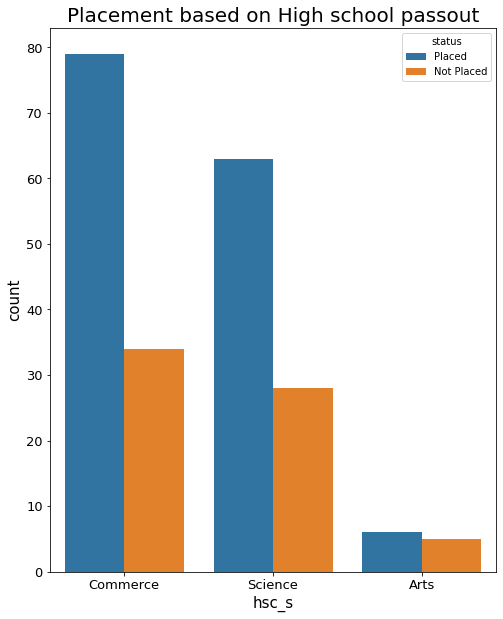

In [80]:
# Look at placement among specialization in higher secondary education
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = df, x = 'hsc_s', hue='status')
plt.title("Placement based on High school passout", fontsize=20)

Text(0.5, 1.0, 'Placement across degree type')

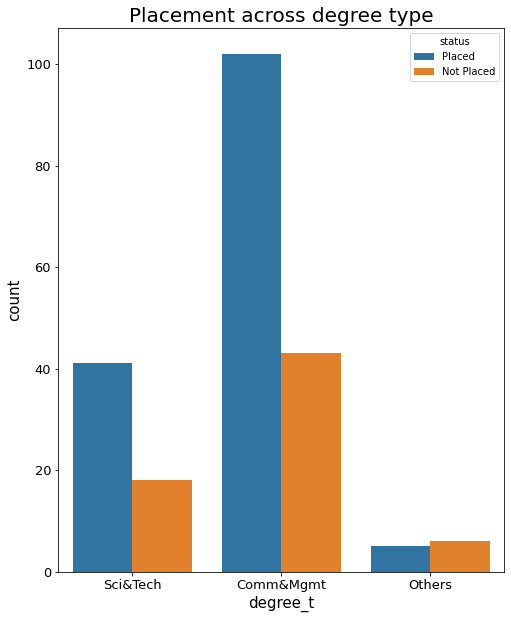

In [81]:
# Look at placement among degree specialization 
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = df, x = 'degree_t', hue ='status')
plt.title("Placement across degree type", fontsize=20)

Text(0.5, 1.0, 'Placement across specialisation')

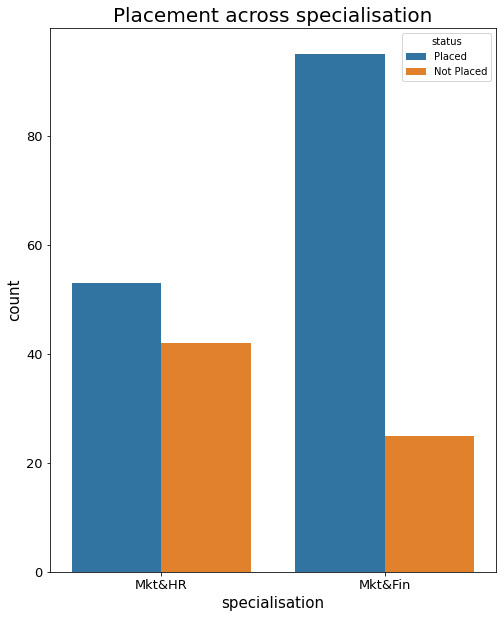

In [82]:
# Look at placement among master specialization 
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = df, x = 'specialisation', hue = 'status')
plt.title("Placement across specialisation", fontsize=20)

### Analysis
* Males have a higher percentage of being placed, as compared to females. (`Not placed` percentage is high in females.)
- From what we see here, it seems like business related specialisation, such as Finance, Management and Commerce tend to have a higher chance of getting a job placement.

## Will work experience affect placement

Text(0.5, 1.0, 'Placement across work experience')

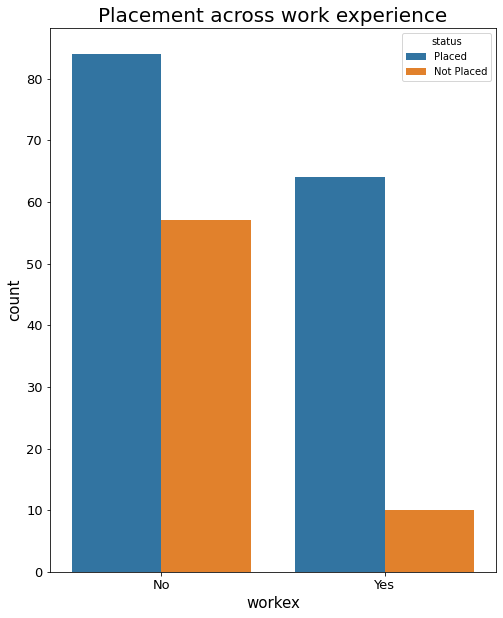

In [83]:
# Look at placement among work experience
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)  
plt.figure(figsize = (8, 10))

sns.countplot(data = df, x = 'workex', hue = 'status')
plt.title("Placement across work experience", fontsize=20)
# use countplot to show placement for those with and without work experience. Remember to include a title for your plots!

### Analysis
* Work experience has effect on job placement.


## Using logistic regression to predict the chance of getting a job placement

In [0]:
# Use label encoder to change categorical data to numerical
le = LabelEncoder()
 
# Implementing LE on gender
le.fit(df.gender.drop_duplicates()) 
df.gender = le.transform(df.gender)

# Implementing LE on ssc_b
le.fit(df.ssc_b.drop_duplicates())
df.ssc_b = le.transform(df.ssc_b)

# Implementing LE on hsc_b
le.fit(df.hsc_b.drop_duplicates())
df.hsc_b = le.transform(df.hsc_b)

# Implementing LE on hsc_s
le.fit(df.hsc_s.drop_duplicates())
df.hsc_s = le.transform(df.hsc_s)

# Implementing LE on degree_t
le.fit(df.degree_t.drop_duplicates())
df.degree_t = le.transform(df.degree_t)

# Implementing LE on workex
le.fit(df.workex.drop_duplicates())
df.workex = le.transform(df.workex)

# Implementing LE on specialisation
le.fit(df.specialisation.drop_duplicates())
df.specialisation = le.transform(df.specialisation)

# Implementing LE on status
le.fit(df.status.drop_duplicates())
df.status = le.transform(df.status)

### Checking modified database

In [85]:
print(df.head())
print(df.dtypes)

   sl_no  gender  ssc_p  ssc_b  ...  specialisation  mba_p  status    salary
0      1       1  67.00      1  ...               1  58.80       1  270000.0
1      2       1  79.33      0  ...               0  66.28       1  200000.0
2      3       1  65.00      0  ...               0  57.80       1  250000.0
3      4       1  56.00      0  ...               1  59.43       0       0.0
4      5       1  85.80      0  ...               0  55.50       1  425000.0

[5 rows x 15 columns]
sl_no               int64
gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object


## Correlational heatmap

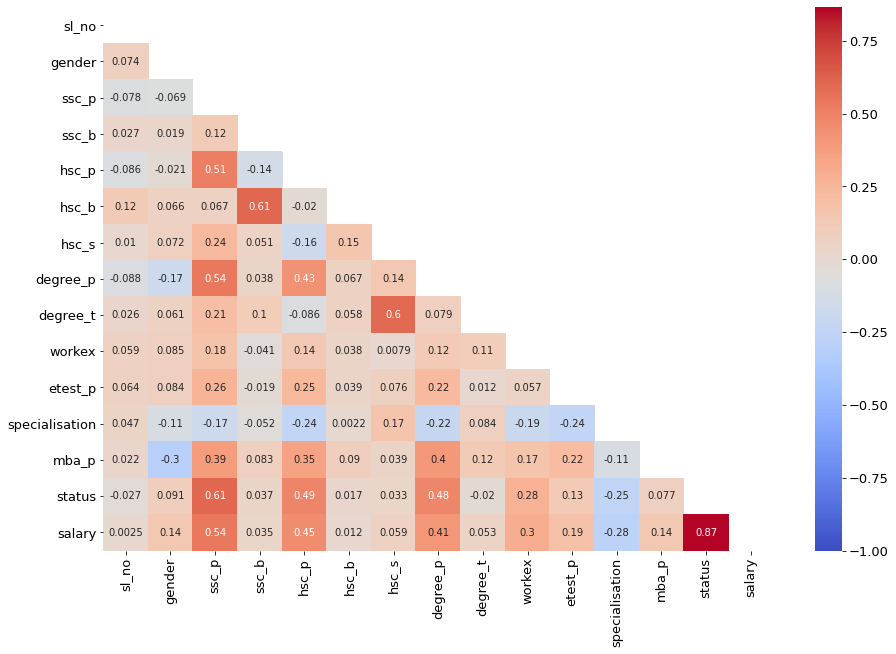

In [88]:
# Using sns.heatmap to show correlation matrix
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), vmin = -1, cmap='coolwarm', annot=True, mask=mask)

## Summary
### Data
* The dataset contains rows of students who are undergoing campus recruitment. Important colums are:
  * hsc_s - Field of study in HSC
  * degree_t - Field of study in degree
  * workex - Yes or No, for having previous work experience
  * specialisation - The field of study
  * status - Placed or Not Placed
  * salary - Gross salary offered

### Analysis
* Chances of getting placed, and have better salary increases with better scores in 10th grade, 12th grade, and in degree.
* Students who meet following criteria have more probability of getting placed:
  * Commerce study in 12th grade and degree
  * Finance specialisation in MBA
  * Years of work experience.